<a href="https://colab.research.google.com/github/scienstien/Basics_Task/blob/main/spider_ML_TASK_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset and necessary imports

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])



train_set = datasets.MNIST(root = './my_data', train = True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 20, shuffle = True)
test_set = datasets.MNIST(root = './my_data', train = False, download = True, transform = transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 20, shuffle = True )


classes = ('0','1', '2', '3', '4', '5', '6', '7', '8', '9')

100%|██████████| 9.91M/9.91M [00:00<00:00, 32.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.20MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.32MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.66MB/s]


# Defining a SKIP_NET MODEL model


In [4]:
print(len(train_set), len(test_set))

60000 10000


In [5]:
# import torch.nn as nn
# import torch.nn.functional as F

# class My_Model(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(1, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 4 * 4, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# model_0 = My_Model()

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class SkipNEt(nn.Module):
  def __init__(self):
    super(SkipNEt, self).__init__()
    self.Flatten = nn.Flatten()
    self.fc1 = nn.Linear(784, 16)
    self.left1 = nn.Linear(16, 8)
    self.right1 = nn.Linear(16, 12)
    self.left2 = nn.Linear(8,8)
    self.right2 = nn.Linear(12,8)
    self.fc2 = nn.Linear(16,47)
  def forward(self, x):
    x = self.Flatten(x)
    x = F.relu(self.fc1(x))
    l1 = F.relu(self.left1(x))
    r1 = F.relu(self.right1(x))
    l2 = F.relu(self.left2(l1))
    r2 = F.relu(self.right2(r1))

    l_out = l1 + l2
    out_put = torch.cat((l_out, r2), 1)
    out_put = self.fc2(out_put)
    return out_put

model_0 = SkipNEt()

# Loss and Optimiser fnc


In [7]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_0.parameters(), lr = 0.01,)

# Training the model

[1,     1] loss: 0.002
[1,   201] loss: 0.472
[1,   401] loss: 0.438
[1,   601] loss: 0.466
[1,   801] loss: 0.484
[1,  1001] loss: 0.451
[1,  1201] loss: 0.466
[1,  1401] loss: 0.426
[1,  1601] loss: 0.432
[1,  1801] loss: 0.441
[1,  2001] loss: 0.479
[1,  2201] loss: 0.451
[1,  2401] loss: 0.475
[1,  2601] loss: 0.451
[1,  2801] loss: 0.458
[2,     1] loss: 0.002
[2,   201] loss: 0.393
[2,   401] loss: 0.430
[2,   601] loss: 0.395
[2,   801] loss: 0.466
[2,  1001] loss: 0.446
[2,  1201] loss: 0.437
[2,  1401] loss: 0.460
[2,  1601] loss: 0.439
[2,  1801] loss: 0.398
[2,  2001] loss: 0.475
[2,  2201] loss: 0.465
[2,  2401] loss: 0.446
[2,  2601] loss: 0.439
[2,  2801] loss: 0.418
[3,     1] loss: 0.001
[3,   201] loss: 0.396
[3,   401] loss: 0.400
[3,   601] loss: 0.429
[3,   801] loss: 0.405
[3,  1001] loss: 0.378
[3,  1201] loss: 0.429
[3,  1401] loss: 0.415
[3,  1601] loss: 0.408
[3,  1801] loss: 0.432
[3,  2001] loss: 0.424
[3,  2201] loss: 0.441
[3,  2401] loss: 0.414
[3,  2601] 

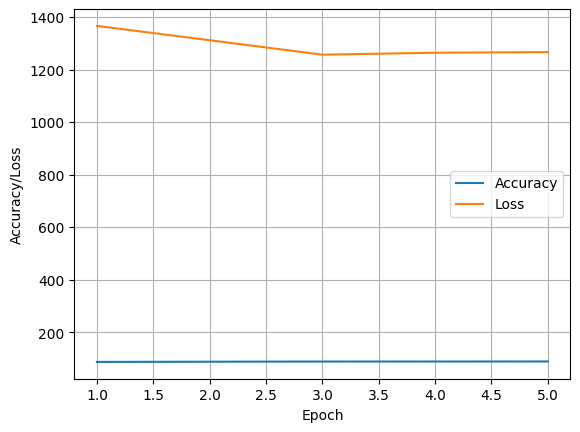

Finished Training


In [13]:
import numpy as np
import matplotlib.pyplot as plt




accuracy_list = []
epoch_loss_list = []
epoch_num = []
epochs = 5
for epoch in range(epochs) :
    model_0.train()
    running_loss = 0.0
    epoch_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data


        # Forward propogation
        outputs = model_0(inputs)
        #loss Fnc
        loss = loss_fn(outputs, labels)
        # zero Grad
        optimizer.zero_grad()
        #backprop
        loss.backward()
        #update weights
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 0 :
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        avg_accuracy = accuracy / len(train_loader)

    accuracy_list.append(accuracy)
    epoch_loss_list.append(epoch_loss)
    epoch_num.append(epoch + 1)




plt.plot(epoch_num, accuracy_list, label = 'Accuracy')
plt.plot(epoch_num, epoch_loss_list, label = 'Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.grid(True)

plt.show()
print('Finished Training')

# Saving the model weights


In [9]:
import pickle


pickle.dump(model_0, open('model.pkl', 'wb'))

# Visually testing if the model is working

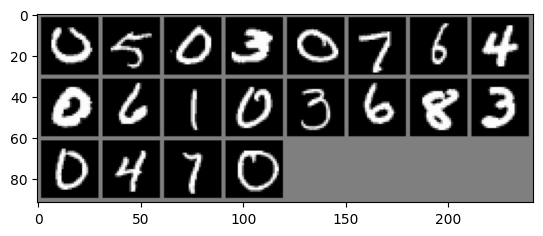

Ground Truth is [0, 5, 0, 3]
Accuracy of model_0 on the test images87.66 %
Predicted:  [0, 7, 0, 3]


In [10]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img * 0.5 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()


for images, labels in test_loader:


    model_0.eval()
    with torch.inference_mode() :
      correct = 0
      total = 0
      for images, labels in test_loader:
          outputs = model_0(images)
          _, predicted = torch.max(outputs, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          accuracy = 100 * correct / total
      imshow(torchvision.utils.make_grid(images))
      ground_truth = [labels[j].item() for j in range(4)]
      print(f'Ground Truth is {ground_truth}')
      print(f'Accuracy of model_0 on the test images{accuracy} %')
      predicted_lbl = [predicted[j].item() for j in range(4)]
      print('Predicted: ', predicted_lbl)
      break


# Applying it on the entire dataset


In [11]:
import torch
import pickle
model_1 = pickle.load(open('model.pkl', 'rb'))


class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model_1.eval()
predicted_labels = []
correct = 0
total = 0
with torch.inference_mode():
    for images, labels in test_loader:

        outputs = model_1(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_accuracy = 100 * correct / total
        c = (predicted == labels).squeeze()
        predicted_labels.extend(predicted.cpu().numpy())

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
print(f'Overall Accuracy on 10000 test images is {test_accuracy}')
for i in range(10):
    if class_total[i] > 0:
        print(f'Accuracy of {i}: {100 * class_correct[i] / class_total[i]:.2f} %')
    else:
        print(f'No samples for class {i}')


Accuracy 87.66
Accuracy of 0: 98.57 %
Accuracy of 1: 95.15 %
Accuracy of 2: 92.05 %
Accuracy of 3: 89.90 %
Accuracy of 4: 77.80 %
Accuracy of 5: 71.30 %
Accuracy of 6: 90.29 %
Accuracy of 7: 92.22 %
Accuracy of 8: 78.54 %
Accuracy of 9: 87.61 %


In [14]:
import pandas as pd


submission_df = pd.DataFrame({
    'Id': range(len(predicted_labels)),
    'Labels': predicted_labels
})

submission_df.to_csv('submission.csv', index=False)

print("✅ submission.csv generated successfully!")

✅ submission.csv generated successfully!
